## Submission Deadline

- All submissions must be made before 10:00 PM on Wednesday, April 16, 2025.

### Late Submissions 

- Late Submission Penalty: A 15% deduction per day will be applied to assignments submitted after the deadline, including SAS accomdations.  

- Late Submission Limit: Assignments submitted **more than 72 hours late** will receive a **grade of zero**, including SAS accomdations. 

## Submission Guidelines

- Format: Submit your work as a single PDF file via Avenue to Learn. You may submit individually or or as a group of up to three members.

### Individual Submission
- Complete Questions 1–15.
- A GitHub repository is optional.

### Group Submission
- Complete Questions 1–17.
- Group Size: Up to three members.
- Team Members' Contributions: For group submissions, you must complete Question 16, detailing each member's contributions. This should correspond with the commit history in the GitHub repository.
  - Note: While Question 16 is not graded, failure to include this information will result in the assignment not being graded.
  - Example:  
    - Member A: Questions 1, 2, 4  
    - Member B: Questions 3, 5, 6  

- GitHub Repository: You must include a link to a public GitHub repository showing the assignment's version history.
  - Note: While Question 17 is not graded, failure to provide this information will result in the assignment not being graded.


## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- Title Page Requirements: Each submission must include a title page featuring your group members' names and student IDs. Assignments without a title page will not be considered for grading.
- Formatting Preferences: The use of Quarto Jupyter Notebook for document preparation is highly recommended.
- Font and Spacing: Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- Individual Work: While discussing homework problems with peers and other groups is permitted, the final written submission must be your group work.
- Submission Content: Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- Academic Writing: Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- Originality Checks: Be aware that the instructor may use various tools, including online resources or in-person meetings, to verify the originality of submitted work.

## Assignment Policy on the Use of Generative AI

- The use of Generative AI is not permitted in assignments, except for using GitHub Copilot as a coding assistant.
    - If GitHub Copilot is used, you must clearly indicate this in the code comments.
-   In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to submit academic work for assessment that was purchased or acquired from another source". This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of "outsourcing of student work to third parties" with or without payment." Using Generative AI tools is a form of contract cheating. Charges of academic dishonesty will be brought forward to the Office of Academic Integrity.



\newpage

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
dataset_url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(dataset_url)
print("Initial dataset head:")
print(df.head())

Initial dataset head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


 # 1
 The goal is to predict whether a patient has heart disease (binary outcome) using various clinical and demographic features

In [28]:
from sklearn.preprocessing import StandardScaler
# checking missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Feature Scaling
# Identify numeric feature columns (excluding the target 'num')
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'num' in numeric_features:
    numeric_features.remove('num')

print("\nNumeric Feature Columns:")
print(numeric_features)

# Apply Standard Scaling to numeric features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nDataset after Scaling (first 5 rows):")
print(df.head())



Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Numeric Feature Columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Dataset after Scaling (first 5 rows):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  num  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650

In [29]:
# 3
print("\n--- Dataset Information ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

--- Statistical Summary ---
                age           sex            cp      trestbps          chol  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  

# Three descriptive statements:
The dataset consists of clinical and demographic variables (e.g., age, sex, chest pain type, blood pressure, cholesterol) that are typical in a heart disease dataset.
The continuous variables (such as age, trestbps, chol, and thalach) show a broad range and their distributions may be normal or slightly skewed.
The dataset initially contains a number of observations (df.shape[0]) and includes some missing values.

In [30]:
# 4
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
print("\nValue counts for transformed binary target 'num':")
print(df['num'].value_counts())


Value counts for transformed binary target 'num':
num
0    164
1    139
Name: count, dtype: int64



Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.380936  0.265246  0.1

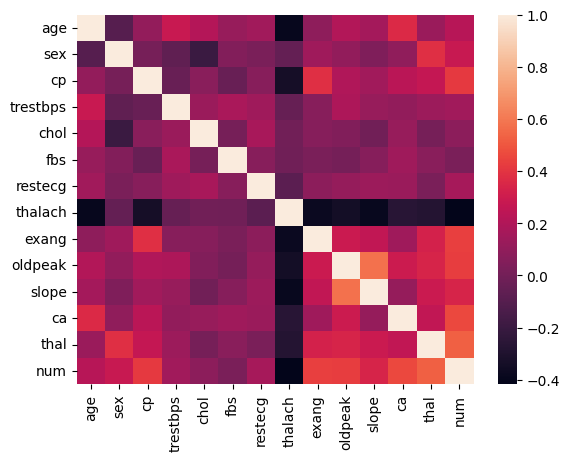

In [45]:
# 5(need further explaining)
corr_matrix = df.corr()
print("\nCorrelation matrix:")
sns.heatmap(corr_matrix)
print(corr_matrix)

Thalach is highly negatively correlated with our target variable, heart disease, as well as with several other variables: ca, slope, oldpeak, exang, and thal. Therefore, for feature selection, thalach contains redundant information and is not essential.

In [32]:
# 6
df_clean = df.dropna()
print("\nNumber of observations after dropping missing values:", df_clean.shape[0])


Number of observations after dropping missing values: 297


In [33]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'num' in numeric_cols:
    numeric_cols.remove('num')
print("\nContinuous variables used for subgroup analysis:", numeric_cols)


Continuous variables used for subgroup analysis: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
pca_results = pca.fit_transform(df_clean[numeric_cols])

df_clean.loc[:, 'pca1'] = pca_results[:, 0]
df_clean.loc[:, 'pca2'] = pca_results[:, 1]

In [39]:
kmeans = KMeans(n_clusters=3, random_state=1)
df_clean.loc[:, 'cluster'] = kmeans.fit_predict(df_clean[numeric_cols])

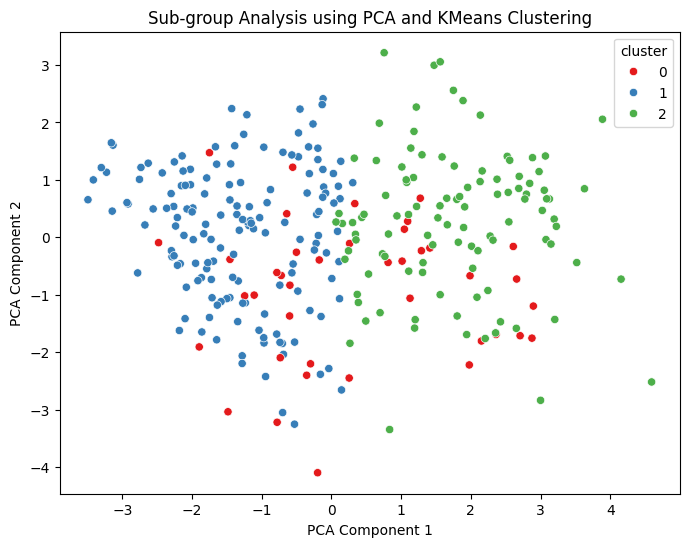

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_clean, palette='Set1')
plt.title('Sub-group Analysis using PCA and KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [41]:
# 8
# Prepare the features and target variables while excluding the additional subgroup columns.
features = df_clean.drop(columns=['num', 'cluster', 'pca1', 'pca2'])
target = df_clean['num']

# Split the data using 30% for testing and 70% for training (random seed = 1).
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 207
Test set size: 90


(9) A logistic regression classifier and a random forest classifier will be used.

(10) The metric will be classification accuracy, computed using .predict() and accuracy_score(). Another metric will be cross-validation score, computed using cross_val_score.

In [ ]:
# 11

m_log = LogisticRegression(max_iter=120)

m_log.fit(X_train, y_train)
pred_prob = m_log.predict_proba(X_test)

m_log_pred = m_log.predict(X_test)
accuracy_score(y_test, m_log_pred) #the default probability cutoff in scikit is 0.5

0.8

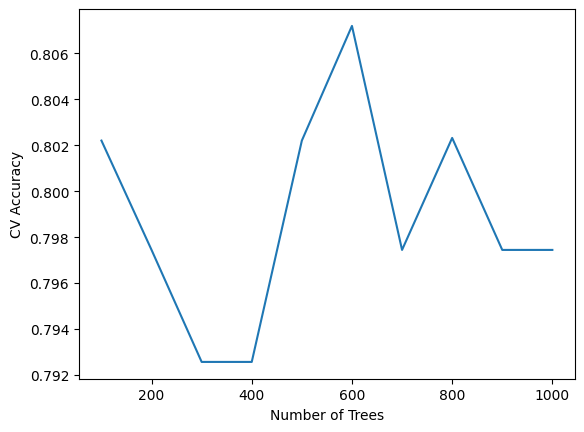

In [44]:
from sklearn.model_selection import cross_val_score

heart_scores_cv = []
ntrees = range(100, 1100, 100)
for n in ntrees:
    scores = cross_val_score(
        RandomForestClassifier(n_estimators=n, max_features=13, random_state=0, bootstrap=True, oob_score=True, criterion='gini'), 
        X_train, 
        y_train, 
        cv=5,
        scoring='accuracy'
    )
    heart_scores_cv.append(scores.mean())

plt.plot(ntrees, heart_scores_cv)
plt.xlabel('Number of Trees')
plt.ylabel('CV Accuracy')
plt.show()

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes (variable type transformation, etc.) [1] \\
     & OR rationale for no transformation [1]\\
3.   & Codes [3] and three statements [2]\\
4.  & Codes for transforming the response variable [1]\\
5.   & Codes for association [2] and interpretation of figures or tables [2]\\
6.   & Codes [1]\\
     & answer [1]\\
7.   & Codes to identify sub groups [3] and Plot the sub groups [1]\\
8.   & Codes [1]\\
9.   & classifiers and justification [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes for training two classifiers [2] \\
      & Codes for tuning parameters (if any) [1]\\
12.   & Codes for feature selection or feature extraction [1]\\
      & Codes for training the third classifier with the selected or extracted features [1] \\
      & Codes for tuning parameters (if any) [1]\\
13.   & Codes for evaluating three classifiers on the test set using two metrics in (10) [3] \\
     & Two statements for the findings [2] \\
     & One statement for the impact of feature selection or extraction [1] \\
14.   & Codes finding the important variables [1] \\
     & Two statements for the analysis and interpretation of the most important predictor variables [2] \\
\hline
\end{tabular}
\end{table}

\newpage

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
15.   & \textcolor{blue}{Codes for the sub-group improvement strategy (training and tuning parameters, if any) [Bonus 2]} \\
     & \textcolor{blue}{Comparison of the performance with the results from (13) [Bonus 1]} \\
     & \textcolor{blue}{\textbf{Bonus 3 points will be added to the final grade}}\\
16.   & Document each team member’s specific contributions  \\
17.   & Link to the public GitHub repository  \\
\hline
\end{tabular}
\end{table}
**The maximum point for this assignment is 39. We will convert this to 100%.** The bonus 3 points will be added to the final grade.

**All group members will receive the same grade if they contribute to the same.**
